# <u>House Prices: Simple and easy 3 steps to submit</u>
This notebook will guide you through three simple and effective steps to submit.

* [1. Preparations](#1)
    * [1.1 Import libraries](#1.1)
    * [1.2 Load dataset](#1.2)
    * [1.3 Check data](#1.3)
    * [1.4 Combine train and test](#1.4)
* [2. Feature Engineering](#2)
    * [2.1 Transform numeric into logarithms](#2.1)
    * [2.2 Transform categorical into one-hot vector](#2.2)
* [3. Prediction and submission](#3)
    * [3.1 Format data](#3.1)
    * [3.2 Prediction](#3.2)
    * [3.3 Create submission](#3.3)

<a id="1"></a><h1 style='background:slateblue; border:.; color:white'><center>1. Preparations</center></h1>

## 1.1 Import libraries<a id="1.1"></a>
**Import all required libraries**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

## 1.2 Load dataset<a id="1.2"></a>
**Load each data as a Pandas DataFrame**

In [106]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [107]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 1.3 Check data<a id="1.3"></a>
**check data shape, count and dtype of each column**

In [109]:
print('=========== train infomation ===========')
train.info()
print('\n\n=========== test infomation ===========')
test.info()

=========== train infomation ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual

## 1.4 Combine train and test<a id="1.4"></a>
**Combine train and test so that you can do each future operation once**

In [110]:
data = pd.concat([train, test])
data.shape

(2919, 81)

## 1.4 fill NA<a id="1.4"></a>
use the imputer to fill the NA


In [111]:
data.shape

(2919, 81)

In [112]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)
data.isnull().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<a id="2"></a><h1 style='background:slateblue; border:.; color:white'><center>2. Feature Engineering</center></h1>

## 2.1 Transform numeric into logarithms<a id="2.1"></a>
**transform all numeric columns of the data frame into logarithms to reduce skewness**<br><br>
Approximating to a normal distribution often improves the accuracy of machine learning.<br>Logarithmic conversion reduces the range when the feature scale is large and expands it when the feature scale is small.<br>This often allows you to get closer to a mountainous distribution as if you were crushing a long-tailed distribution.

In [113]:
# current numeric data
numerics = data.loc[:,data.dtypes != 'object'].drop('Id', axis=1)

numerics.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [114]:
tmp = numerics.drop('SalePrice', axis = 1)
tmp.isnull().sum(axis = 0)

MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [115]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(tmp)
tmp[tmp.columns] = imp_mean.transform(tmp)
tmp.isnull().sum(axis = 0)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [116]:
numerics[numerics.drop('SalePrice', axis = 1).columns] = tmp

In [117]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
numerics[list(numerics.columns)] = scaler.fit_transform(numerics)
numerics.head

<bound method NDFrame.head of       MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1       0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2       0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3       0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4       0.235294     0.215753  0.060576     0.777778        0.500   0.927536   
...          ...          ...       ...          ...          ...        ...   
1454    0.823529     0.000000  0.002973     0.333333        0.750   0.710145   
1455    0.823529     0.000000  0.002776     0.333333        0.500   0.710145   
1456    0.000000     0.476027  0.087406     0.444444        0.750   0.637681   
1457    0.382353     0.140411  0.042726     0.444444        0.500   0.869565   
1458    0.235294     0.181507  0.038921     0.666667        0.500   0.876812   

      Yea

The skewnesses of many features are reduced by logarithmic conversion. Some skewnesses have increased, but overall it has decreased.

## 2.2 Transform categorical into one-hot vector<a id="2.2"></a>
**transform all categorical columns of the data frame into one-hot vector**<br><br>
Since GBDT treats features as numerical data, it is necessary to convert categorical data to numerical values. Label encoding is fine, but one-hot encoding often has better performance.

In [118]:
cat_cols = data.loc[:,data.dtypes == 'object'].columns
data.loc[:,cat_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [119]:
cat_data = data.loc[:, cat_cols]
cat_data.head()
for i in cat_cols.values:
    
    labels = cat_data[i].astype('category').cat.categories.tolist()
    replace_map_comp = {i : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    cat_data.replace(replace_map_comp, inplace=True)



In [120]:
cat_data = cat_data.fillna(0)
cat_data.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,4.0,2,0.0,4,4,1.0,5,1,6,3,3,1,6,2,2,13.0,14.0,2.0,3,5,3,3.0,4.0,4.0,3.0,6.0,2,1,2,5.0,3.0,7.0,0.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5
1,4.0,2,0.0,4,4,1.0,3,1,25,2,3,1,3,2,2,9.0,9.0,3.0,4,5,2,3.0,4.0,2.0,1.0,6.0,2,1,2,5.0,4.0,7.0,5.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5
2,4.0,2,0.0,1,4,1.0,5,1,6,3,3,1,6,2,2,13.0,14.0,2.0,3,5,3,3.0,4.0,3.0,3.0,6.0,2,1,2,5.0,3.0,7.0,5.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5
3,4.0,2,0.0,1,4,1.0,1,1,7,3,3,1,6,2,2,14.0,16.0,3.0,4,5,1,4.0,2.0,4.0,1.0,6.0,2,3,2,5.0,3.0,7.0,3.0,6.0,3.0,5.0,5.0,3,0.0,0.0,0.0,9.0,1
4,4.0,2,0.0,1,4,1.0,3,1,16,3,3,1,6,2,2,13.0,14.0,2.0,3,5,3,3.0,4.0,1.0,3.0,6.0,2,1,2,5.0,3.0,7.0,5.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5


<a id="3"></a>
<h1 style='background:slateblue; border:.; color:white'><center>3. Prediction and submission</center></h1>

## 3.1 Format data<a id="3.1"></a>
**Format data for training**

In [121]:
# merge categorical and numeric columns
optimized_data = pd.concat([data['Id'], cat_data, numerics], axis=1)
optimized_data.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,4.0,2,0.0,4,4,1.0,5,1,6,3,3,1,6,2,2,13.0,14.0,2.0,3,5,3,3.0,4.0,4.0,3.0,6.0,2,1,2,5.0,3.0,7.0,0.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,2,4.0,2,0.0,4,4,1.0,3,1,25,2,3,1,3,2,2,9.0,9.0,3.0,4,5,2,3.0,4.0,2.0,1.0,6.0,2,1,2,5.0,4.0,7.0,5.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,3,4.0,2,0.0,1,4,1.0,5,1,6,3,3,1,6,2,2,13.0,14.0,2.0,3,5,3,3.0,4.0,3.0,3.0,6.0,2,1,2,5.0,3.0,7.0,5.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,4,4.0,2,0.0,1,4,1.0,1,1,7,3,3,1,6,2,2,14.0,16.0,3.0,4,5,1,4.0,2.0,4.0,1.0,6.0,2,3,2,5.0,3.0,7.0,3.0,6.0,3.0,5.0,5.0,3,0.0,0.0,0.0,9.0,1,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,5,4.0,2,0.0,1,4,1.0,3,1,16,3,3,1,6,2,2,13.0,14.0,2.0,3,5,3,3.0,4.0,1.0,3.0,6.0,2,1,2,5.0,3.0,7.0,5.0,2.0,2.0,5.0,5.0,3,0.0,0.0,0.0,9.0,5,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [122]:
# split data into X_train, y_train and test
train = optimized_data[:train.shape[0]]
test = optimized_data[train.shape[0]:].drop(['Id', 'SalePrice'], axis=1)
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']

> ## 3.2 learn and Prediction<a id="3.2"></a>
**fit and predict using lightGBM**

In [123]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [124]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    

SEED = 42
set_seed(SEED)



In [125]:
# train
%time


# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 25, 50, 100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
model_desicion_tree = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


model_desicion_tree.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
print(model_desicion_tree.get_params())
print('-----')


CPU times: user 13 µs, sys: 1 µs, total: 14 µs
Wall time: 17.9 µs
Fitting 3 folds for each of 504 candidates, totalling 1512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1512 out of 1512 | elapsed:  4.9min finished


-----
Best parameters {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
Mean cross-validated accuracy score of the best_estimator: 0.815
{'cv': 3, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': None, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(), 'iid': 'deprecated', 'n_jobs': -1, 'param_grid': {'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 

In [126]:
from sklearn.linear_model import ElasticNet
# Create the parameter grid based on the results of random search 
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

elastic_net = ElasticNet()

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0,0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

# Instantiate the grid search model
glm = GridSearchCV(estimator = elastic_net, 
                   param_grid = param_grid, 
                    cv = 5, n_jobs = -1, verbose = 2)


glm.fit(X_train, y_train)

print('-----')
print(f'Best parameters {glm.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{glm.best_score_:.3f}'
)
print(glm.get_params())
print('-----')

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.8s


-----
Best parameters {'alpha': 0.001, 'l1_ratio': 0.01}
Mean cross-validated accuracy score of the best_estimator: 0.821
{'cv': 5, 'error_score': nan, 'estimator__alpha': 1.0, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__l1_ratio': 0.5, 'estimator__max_iter': 1000, 'estimator__normalize': False, 'estimator__positive': False, 'estimator__precompute': False, 'estimator__random_state': None, 'estimator__selection': 'cyclic', 'estimator__tol': 0.0001, 'estimator__warm_start': False, 'estimator': ElasticNet(), 'iid': 'deprecated', 'n_jobs': -1, 'param_grid': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': [0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 2}
-----


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    3.2s finished


In [131]:
# Various hyper-parameters to tune
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)


xgb.fit(X_train, y_train)

print('-----')
print(f'Best parameters {xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{xgb.best_score_:.3f}'
)
print(xgb.get_params())
print('-----')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   45.7s finished


[00:24:03] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[00:24:03] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:24:04] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
-----
Best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Mean cross-validated accuracy score of the best_estimator: 0.887
{'cv': 5, 'error_score': nan, 'estimator__objective': 'reg:squarederror', 'estimator__base_score': None, 'estimator__booster': None, 'estimator__colsample_bylevel': None, 'estimator_

## 3.3 Create submission<a id="3.3"></a>
**convert prediction into exponent and export CSV file**

In [127]:
def create_submission(model, X_test, test_house_id, model_name):
    y_pred_test = model.predict(X_test)
    submission = pd.DataFrame(
        {
            'houseID': test_house_id, 
            'Survived': y_pred_test,
        }
    )
    print(model_name)
    print(submission.head())
    submission.to_csv(f"submission_{model_name}.csv", index=False)
    return submission

In [132]:
# convert logarithms into exponent
pred1 = create_submission(model_desicion_tree, test[X_train.columns], test.index.values, 'rf')

pred2 = create_submission(glm, test[X_train.columns], test.index.values, 'glm')
pred3 = create_submission(xgb, test[X_train.columns], test.index.values, 'xgboost')


rf
   houseID  Survived
0        0  0.134829
1        1  0.161485
2        2  0.210568
3        3  0.219438
4        4  0.220387
glm
   houseID  Survived
0        0  0.101527
1        1  0.167100
2        2  0.185528
3        3  0.210361
4        4  0.214904
xgboost
   houseID  Survived
0        0  0.129396
1        1  0.170673
2        2  0.204138
3        3  0.222026
4        4  0.209824


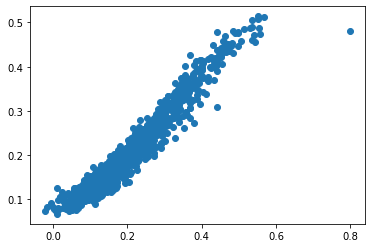

In [134]:
plt.scatter(pred2.Survived.values,pred1.Survived.values)

This notebook has a score of 0.13142 and is in the top 30%.<br>Based on this notebook, Feature engineering, Hyper-parameter tuning and ensemble will give you a better score.